In [72]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
import pprint as pp

digits = datasets.load_digits()

# Data Import

In [73]:
# View the description
pp.pprint(digits.DESCR)

('.. _digits_dataset:\n'
 '\n'
 'Optical recognition of handwritten digits dataset\n'
 '--------------------------------------------------\n'
 '\n'
 '**Data Set Characteristics:**\n'
 '\n'
 '    :Number of Instances: 1797\n'
 '    :Number of Attributes: 64\n'
 '    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n'
 '    :Missing Attribute Values: None\n'
 "    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n"
 '    :Date: July; 1998\n'
 '\n'
 'This is a copy of the test set of the UCI ML hand-written digits datasets\n'
 'https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n'
 '\n'
 'The data set contains images of hand-written digits: 10 classes where\n'
 'each class refers to a digit.\n'
 '\n'
 'Preprocessing programs made available by NIST were used to extract\n'
 'normalized bitmaps of handwritten digits from a preprinted form. From a\n'
 'total of 43 people, 30 contributed to the training set and different 13\n'
 'to the test

In [74]:
# View the data
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [75]:
# View target values
print(digits.target)

[0 1 2 ... 8 9 8]


<Figure size 640x480 with 0 Axes>

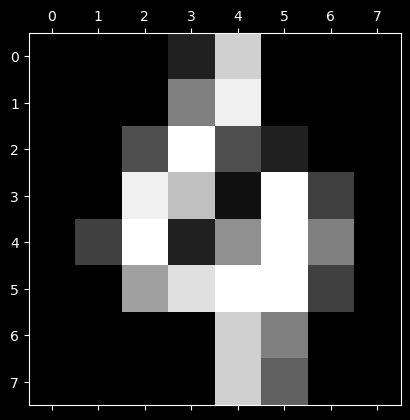

4


In [76]:
# View a sample image
plt.gray()
plt.matshow(digits.images[100])
plt.show()

# Print target for same index
print(digits.target[100])

View the 64 sample images. Copied and pasted from Codecademy example.

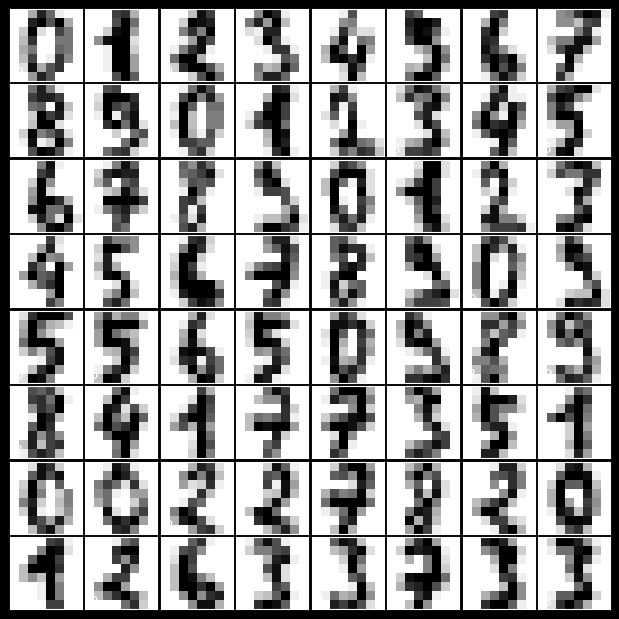

In [77]:
# Figure size (width, height)

fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 

fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images

for i in range(64):

    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position

    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])

    # Display an image at the i-th position

    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # Label the image with the target value

    ax.text(0, 7, str(digits.target[i]))

plt.show()

# Clustering the Images into Groups

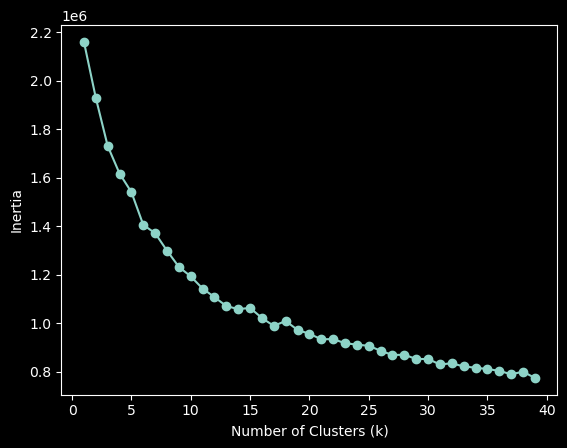

In [78]:
from tkinter import N
from sklearn.cluster import KMeans

# set the data to an array
samples = digits.data


# initiate inertia list
inertias = []

# create array of potential cluster values
num_clusters = list(range(1,40))

# Iterate through num_clusters and append their inertia to inertias
for i in num_clusters:
    model = KMeans(n_clusters = i, n_init='auto')
    model.fit(samples)
    inertias.append(model.inertia_)

# plot inertias 
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

From visual analysis of the graph, the optimal value of `k` likely lies between 10 and 15.

In [79]:
# create model with optimal k
k = 12
model = KMeans(n_clusters=k, n_init='auto')
model.fit(samples)

KMeans(n_clusters=12, n_init='auto')

# Visualizing the Centroids

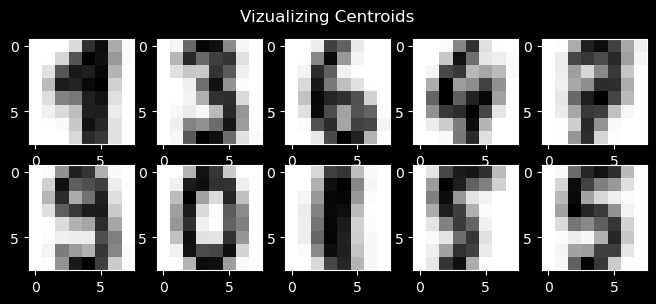

In [80]:
# create figure
fig = plt.figure(figsize=(8,3))
fig.suptitle('Vizualizing Centroids') 

for i in range(10):

  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)

  # Display images
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

plt.show()

# Testing on My Handwriting

In [81]:
new_samples = np.array([
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.46,4.96,6.10,6.02,2.13,0.00,0.00,0.00,0.76,5.95,4.96,6.56,7.32,0.61,0.00,0.00,0.00,0.00,0.00,2.06,7.62,1.52,0.00,0.15,2.74,3.05,1.53,5.26,7.55,1.07,0.00,2.90,7.62,7.62,7.62,7.62,3.58,0.00,0.00,1.14,7.17,7.62,7.01,7.62,5.11,0.46,0.00,0.00,0.00,0.00,0.08,4.58,7.55,1.75,0.00],
[0.00,0.15,2.90,0.23,1.30,2.21,0.00,0.00,0.00,1.30,7.62,2.29,4.12,7.62,0.00,0.00,0.00,1.52,7.62,1.98,3.05,7.62,0.00,0.00,0.00,2.29,7.62,4.27,5.18,7.55,0.69,0.00,0.00,1.60,6.86,7.47,7.62,7.62,5.11,0.00,0.00,0.00,0.00,0.00,6.10,5.49,0.61,0.00,0.00,0.00,0.00,0.00,7.47,4.42,0.00,0.00,0.00,0.00,0.00,0.00,4.88,2.59,0.00,0.00],
[0.00,0.00,2.36,3.05,1.83,0.08,0.00,0.00,0.00,3.89,7.62,7.62,7.62,6.18,0.00,0.00,0.00,6.10,6.63,3.13,7.47,7.62,0.00,0.00,0.00,3.89,7.62,7.62,7.62,7.01,0.00,0.00,0.00,0.00,0.99,1.53,5.57,5.72,0.00,0.00,0.00,0.00,0.00,0.00,5.34,5.34,0.00,0.00,0.00,0.00,0.00,0.00,5.34,5.34,0.00,0.00,0.00,0.00,0.00,0.00,1.68,1.53,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.92,6.71,6.71,5.87,3.89,0.00,0.00,0.00,0.30,3.66,4.42,6.48,6.86,0.00,0.00,0.00,0.00,2.44,3.05,6.10,7.24,5.11,4.42,0.00,0.00,7.01,7.62,7.62,7.62,7.02,3.36,0.00,0.00,0.00,3.51,7.63,0.92,0.00,0.00,0.00,0.00,0.00,5.79,5.87,0.00,0.00,0.00,0.00,0.00,0.00,1.37,0.84,0.00,0.00,0.00,0.00]
])

In [82]:
# model prediction of new_samples
new_labels = model.predict(new_samples)

# loop through new labels to assign values
for i in range(len(new_labels)):
  if new_labels[i] == 0:
    print(0, end='')
  elif new_labels[i] == 1:
    print(9, end='')
  elif new_labels[i] == 2:
    print(2, end='')
  elif new_labels[i] == 3:
    print(1, end='')
  elif new_labels[i] == 4:
    print(6, end='')
  elif new_labels[i] == 5:
    print(8, end='')
  elif new_labels[i] == 6:
    print(4, end='')
  elif new_labels[i] == 7:
    print(5, end='')
  elif new_labels[i] == 8:
    print(7, end='')
  elif new_labels[i] == 9:
    print(3, end='')

1006

The model doesn't seem to recognize my handwriting. 
